# Initial imports and exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

%matplotlib inline
#Imports

In [3]:
#Load Data into dataframes
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

# Dummy exploration and crafting

In [6]:
train['MS Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

In [7]:
dummy_vars = ['MS Zoning', "House Style", "Central Air"]

In [8]:
dummies_1 = pd.get_dummies(train['MS Zoning'], 'MS Zoning')
dummies_1.columns

Index(['MS Zoning_A (agr)', 'MS Zoning_C (all)', 'MS Zoning_FV',
       'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM'],
      dtype='object')

In [9]:
train['Exter Qual'].value_counts()
Exter_dict = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
train['Exter Qual'].replace(Exter_dict, inplace = True)


In [10]:
train['House Style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

In [11]:
dummies_3 = pd.get_dummies(train['House Style'], 'House Style')
dummies_3.columns

Index(['House Style_1.5Fin', 'House Style_1.5Unf', 'House Style_1Story',
       'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
       'House Style_SFoyer', 'House Style_SLvl'],
      dtype='object')

In [12]:
train['Heating QC'].value_counts()
Heating_dict = {"Po": 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
train['Heating QC'].replace(Heating_dict, inplace = True)


In [13]:
train['Central Air'].value_counts()

Y    1910
N     141
Name: Central Air, dtype: int64

In [14]:
dummies_5 = pd.get_dummies(train['Central Air'], 'Central Air')
dummies_5.columns

Index(['Central Air_N', 'Central Air_Y'], dtype='object')

In [15]:
train = pd.concat([train, dummies_1, dummies_3, dummies_5], axis = 1)

# Initial EDA

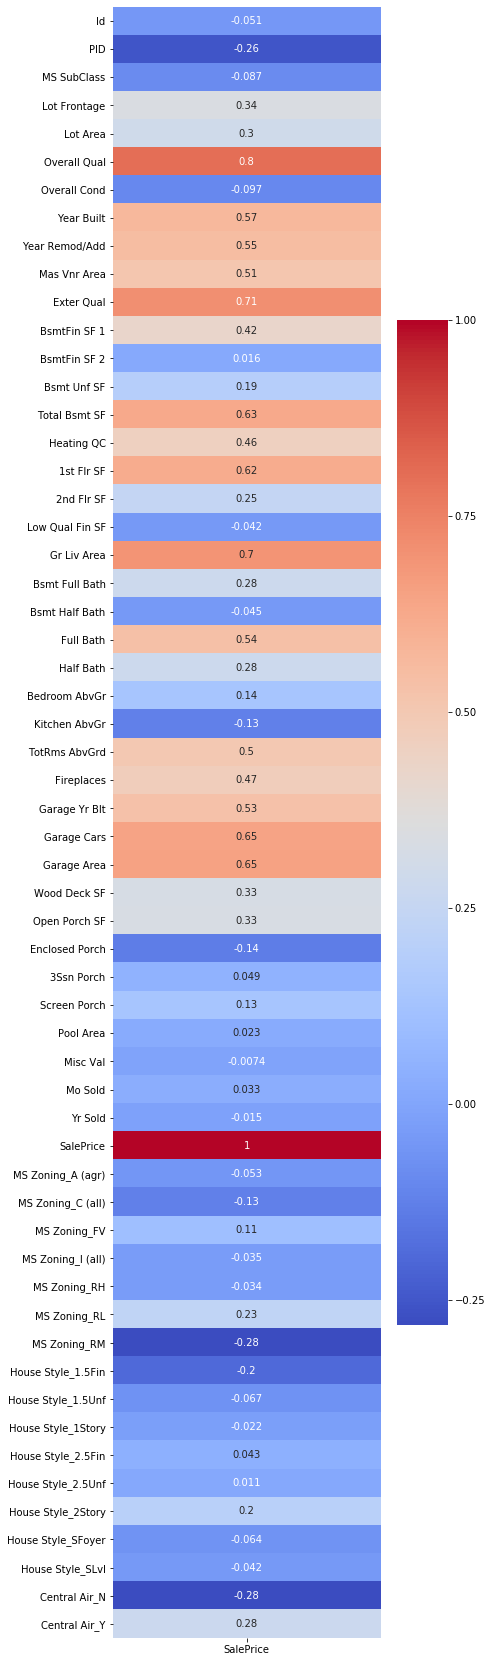

In [16]:
plt.figure(figsize = (6,30))
sns.heatmap(train.corr()[['SalePrice']], annot = True,  cmap = 'coolwarm')

In [17]:
print(dummies_1.columns)
print(dummies_3.columns)
print(dummies_5.columns)

Index(['MS Zoning_A (agr)', 'MS Zoning_C (all)', 'MS Zoning_FV',
       'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM'],
      dtype='object')
Index(['House Style_1.5Fin', 'House Style_1.5Unf', 'House Style_1Story',
       'House Style_2.5Fin', 'House Style_2.5Unf', 'House Style_2Story',
       'House Style_SFoyer', 'House Style_SLvl'],
      dtype='object')
Index(['Central Air_N', 'Central Air_Y'], dtype='object')


In [18]:
type(dummies_1.columns)

pandas.core.indexes.base.Index

In [19]:
features = ['Overall Qual', 
            'Year Built', 
            'Year Remod/Add', 
            'Total Bsmt SF',
            'Mas Vnr Area',
            '1st Flr SF',
            '2nd Flr SF',
            'Gr Liv Area', 
            'Full Bath', 
            'TotRms AbvGrd', 
            'Fireplaces', 
            'Garage Yr Blt', 
            'Garage Cars', 
            'Garage Area',
            'Exter Qual', 
            'House Style_1.5Fin', 
            'House Style_1.5Unf', 
            'House Style_2.5Fin', 
            'House Style_2.5Unf', 
            'House Style_2Story',
            'House Style_SFoyer', 
            'House Style_SLvl',
            'Heating QC',
            'Central Air_N'
           ] 
#First foray into feature selection


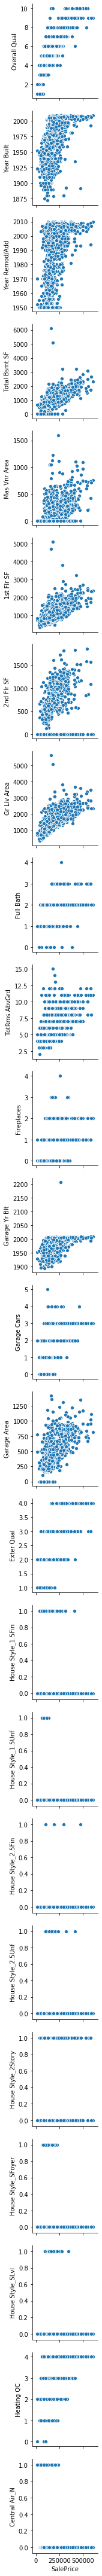

In [20]:
sns.pairplot(train, y_vars = features, x_vars = ['SalePrice'])

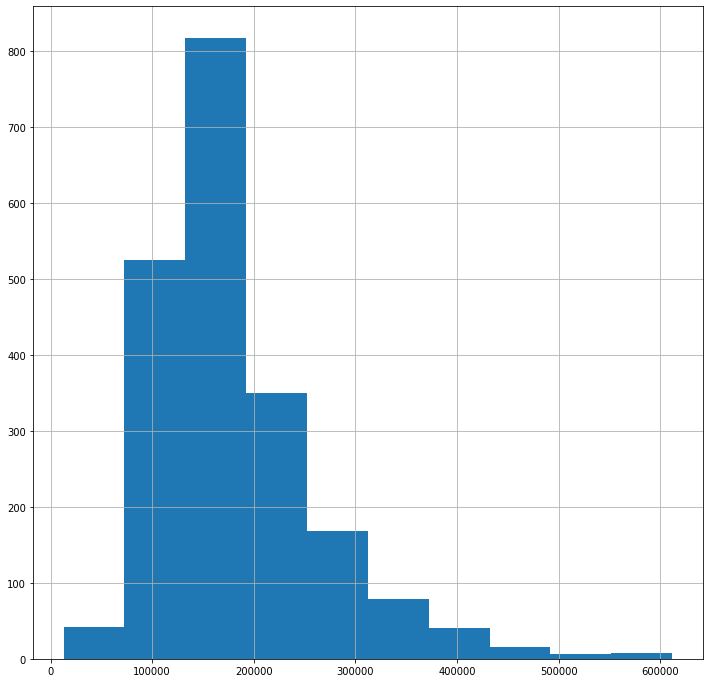

In [21]:
train['SalePrice'].hist(figsize = (12,12))

# More feature engineering/cleaning

In [22]:
train[features].isnull().sum()

Overall Qual            0
Year Built              0
Year Remod/Add          0
Total Bsmt SF           1
Mas Vnr Area           22
1st Flr SF              0
2nd Flr SF              0
Gr Liv Area             0
Full Bath               0
TotRms AbvGrd           0
Fireplaces              0
Garage Yr Blt         114
Garage Cars             1
Garage Area             1
Exter Qual              0
House Style_1.5Fin      0
House Style_1.5Unf      0
House Style_2.5Fin      0
House Style_2.5Unf      0
House Style_2Story      0
House Style_SFoyer      0
House Style_SLvl        0
Heating QC              0
Central Air_N           0
dtype: int64

In [23]:
train[features].dtypes

Overall Qual            int64
Year Built              int64
Year Remod/Add          int64
Total Bsmt SF         float64
Mas Vnr Area          float64
1st Flr SF              int64
2nd Flr SF              int64
Gr Liv Area             int64
Full Bath               int64
TotRms AbvGrd           int64
Fireplaces              int64
Garage Yr Blt         float64
Garage Cars           float64
Garage Area           float64
Exter Qual              int64
House Style_1.5Fin      uint8
House Style_1.5Unf      uint8
House Style_2.5Fin      uint8
House Style_2.5Unf      uint8
House Style_2Story      uint8
House Style_SFoyer      uint8
House Style_SLvl        uint8
Heating QC              int64
Central Air_N           uint8
dtype: object

In [24]:
train['Garage Yr Blt'].describe()

count    1937.000000
mean     1978.707796
std        25.441094
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

In [25]:
train['Garage Yr Blt'].replace(np.nan, 1980, inplace = True)

In [26]:
train['Garage Yr Blt'].describe()

count    2051.000000
mean     1978.779620
std        24.725364
min      1895.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64

In [27]:
train.dropna(subset = features, inplace = True)

In [28]:
train[features].isnull().sum().sum()

0

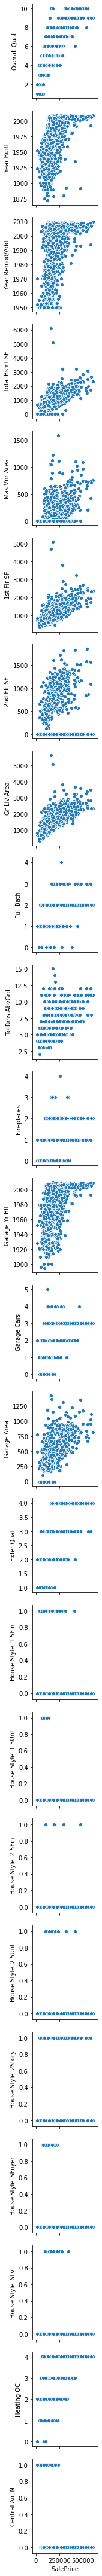

In [29]:
sns.pairplot(train, y_vars = features, x_vars = ['SalePrice'])

# Modeling time

In [30]:
X = train[features]
y = train['SalePrice']
#X_OLS = train[features]
X_OLS = sm.add_constant(X)


C:\Users\NICK\Anaconda3\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
len(features)

24

In [32]:
model_sm = sm.OLS(y, X_OLS).fit()

In [33]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     371.4
Date:                Wed, 26 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:47:06   Log-Likelihood:                -24019.
No. Observations:                2027   AIC:                         4.809e+04
Df Residuals:                    2002   BIC:                         4.823e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.685e+05   1.24

In [34]:
model = LinearRegression()


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 52)


In [36]:
X_train.shape

(1520, 24)

In [37]:
X_test.shape

(507, 24)

In [38]:
cross_val_score(model, X_train, y = y_train, cv = 5).mean()

0.8042951624720148

In [39]:
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
model.score(X_train, y_train)

0.821855870188498

In [41]:
model.score(X_test, y_test)

0.7969140748578114

In [42]:
def r2_adj(r2,X):
    return 1 - ((1-r2)*(len(X)-1))/(len(X)-len(X.columns)-1)

def print_metrics(model_pass, X_pass,y_pass ):
    residual = model_pass.predict(X_pass) - y_pass
    print(f"Mean squared error: {(residual**2).mean()}")
    r2 = model_pass.score(X_pass, y_pass)
    print(f"R Squared value: {r2}")
    print(f"Adjusted R Squared Value: {r2_adj(r2, X)}")
    print(f"Root mean squared error: {np.sqrt((residual**2).mean())}")
    print(f'Residual sum of squares: {(residual**2).sum()}')
    print(f"Residual mean: {residual.mean()}")

In [43]:
print_metrics(model, X_train, y_train)

Mean squared error: 1092843824.5112836
R Squared value: 0.821855870188498
Adjusted R Squared Value: 0.8197202762247238
Root mean squared error: 33058.18846384786
Residual sum of squares: 1661122613257.152
Residual mean: 4.3119622492476515e-11


In [44]:
print_metrics(model, X_test, y_test)

Mean squared error: 1340453445.8841484
R Squared value: 0.7969140748578114
Adjusted R Squared Value: 0.7944794783526103
Root mean squared error: 36612.20351036179
Residual sum of squares: 679609897063.2633
Residual mean: -493.7488775031572


# Getting Test to where train is already

In [45]:
test['Heating QC'].replace(Heating_dict, inplace = True)
test['Exter Qual'].replace(Exter_dict, inplace = True)


In [46]:
test = pd.get_dummies(test, columns = dummy_vars)


In [47]:
test.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
     

In [49]:
test['Garage Yr Blt'].replace(np.nan, 1980, inplace = True)

In [50]:
test[features].isnull().sum()

Overall Qual          0
Year Built            0
Year Remod/Add        0
Total Bsmt SF         0
Mas Vnr Area          1
1st Flr SF            0
2nd Flr SF            0
Gr Liv Area           0
Full Bath             0
TotRms AbvGrd         0
Fireplaces            0
Garage Yr Blt         0
Garage Cars           0
Garage Area           0
Exter Qual            0
House Style_1.5Fin    0
House Style_1.5Unf    0
House Style_2.5Fin    0
House Style_2.5Unf    0
House Style_2Story    0
House Style_SFoyer    0
House Style_SLvl      0
Heating QC            0
Central Air_N         0
dtype: int64

In [51]:
train['Mas Vnr Area'].median()


0.0

In [52]:
test['Mas Vnr Area'].replace(np.nan, 0, inplace = True)

In [55]:
test[features].isnull().sum()

Overall Qual          0
Year Built            0
Year Remod/Add        0
Total Bsmt SF         0
Mas Vnr Area          0
1st Flr SF            0
2nd Flr SF            0
Gr Liv Area           0
Full Bath             0
TotRms AbvGrd         0
Fireplaces            0
Garage Yr Blt         0
Garage Cars           0
Garage Area           0
Exter Qual            0
House Style_1.5Fin    0
House Style_1.5Unf    0
House Style_2.5Fin    0
House Style_2.5Unf    0
House Style_2Story    0
House Style_SFoyer    0
House Style_SLvl      0
Heating QC            0
Central Air_N         0
dtype: int64

In [56]:
X_test_real = test[features]


In [57]:
y_pred = model.predict(X_test_real)

In [58]:
test['SalePrice'] = y_pred

In [59]:
submission = test[['Id', 'SalePrice']]

In [60]:
submission.to_csv("Submission1.csv", index = False)